In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

# BUSINESS UNDERSTANDING

explain the reaoning/proposal

# OBJECTIVES

# DATA UNDERSTANDING

We used data from various sources specifically key macroeconomic indicators as well as other indicators such as the exchange rate(target variable), interest rates such as banking(deposit, lending, overdraft, savings), and central bank rates(T-bills, Cash Reserve, Inter-bank Rates).

Due to the variation in timeline for the data sources, some daily, monthly, and yearly, we worked using averages and came up with 4 different data sets. Our primary one is the monthly dataset(with some repeat values), and also the yearly average(with no repeat values).

For our initial analysis, we shall work with the monthly dataset and then proceed with the yearly average one especially for modelling. 

### LOADING DATA & EDA ANALYSIS

In [2]:
# Loading dataset that contains monthly
dfmonthly= pd.read_csv('final_a.csv')
#loading data that has closing dates annually
dfclosing= pd.read_csv('Closing_date.csv')
#loading the data with opening dates annually
dfopening= pd.read_excel('yearly opening.xlsx')
#loading the averaged yearly data
dfaverage= pd.read_csv('Yearly_ava.csv')

We loaded all 4 datasets, however for the EDA and initial visualization analysis, we shall use dfmonthly and dfaverage. The dfopening and dfclosing may appear in latter stages of the project. They have been loaded on because the cleaning stemps will still apply to them as well 

In [3]:
print(dfmonthly.shape)
dfmonthly.info()

(228, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           228 non-null    object 
 1   12-Month Inflation(%)                          228 non-null    float64
 2   Total Remittances                              228 non-null    float64
 3   Total Debt                                     204 non-null    float64
 4   Imports                                        228 non-null    int64  
 5   Exports                                        228 non-null    int64  
 6   Foreign direct investment                      228 non-null    float64
 7   IBRD loans and IDA credits (DOD, current US$)  228 non-null    int64  
 8   Unemployment Rate                              228 non-null    float64
 9   exchange_rate                               

We have 228 rows of data in the monthly data set. 

In [4]:
print(dfaverage.shape)
dfaverage.info()

(19, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           19 non-null     object 
 1   12-Month Inflation(%)                          19 non-null     float64
 2   Total Remittances                              19 non-null     float64
 3   Total Debt                                     17 non-null     float64
 4   Imports                                        19 non-null     int64  
 5   Exports                                        19 non-null     int64  
 6   Foreign direct investment                      19 non-null     float64
 7   IBRD loans and IDA credits (DOD, current US$)  19 non-null     int64  
 8   Unemployment Rate                              19 non-null     float64
 9   exchange_rate                                  

We have 19 rows in the yearly average as we are only using the yearly average across the months.

In [5]:
print('\nMissing values in the monthly data are as follows;\n')
print(dfmonthly.isnull().sum())


Missing values in the monthly data are as follows;

Date                                              0
12-Month Inflation(%)                             0
Total Remittances                                 0
Total Debt                                       24
Imports                                           0
Exports                                           0
Foreign direct investment                         0
IBRD loans and IDA credits (DOD, current US$)     0
Unemployment Rate                                 0
exchange_rate                                     0
Deposit                                           0
Savings                                           0
Lending                                           0
Overdraft                                         0
Interbank Rate                                    0
91-Day Tbill                                      0
182-days Tbill                                    0
364-days Tbill                                    0
Cash Reserv

In [6]:
print('\nMissing values in the yearly data are as follows')
print(dfaverage.isnull().sum())


Missing values in the yearly data are as follows
Date                                             0
12-Month Inflation(%)                            0
Total Remittances                                0
Total Debt                                       2
Imports                                          0
Exports                                          0
Foreign direct investment                        0
IBRD loans and IDA credits (DOD, current US$)    0
Unemployment Rate                                0
exchange_rate                                    0
Deposit                                          0
Savings                                          0
Lending                                          0
Overdraft                                        0
Interbank Rate                                   0
91-Day Tbill                                     0
182-days Tbill                                   0
364-days Tbill                                   4
Cash Reserve Requirement        

Considering the few values we have missing in the monthly & yearly , we shall fill these with mean later on.

### Duplicates

In [7]:
for df_name, df in zip(['dfmonthly', 'dfaverage', 'dfclosing', 'dfopening'], [dfmonthly, dfaverage, dfclosing, dfopening]):
    print(f"{df_name}: {df.duplicated().sum()} duplicate rows")


dfmonthly: 0 duplicate rows
dfaverage: 0 duplicate rows
dfclosing: 0 duplicate rows
dfopening: 0 duplicate rows


### Summary, of the primary datasets (dfmonthly, dfaverage)

In [8]:
dfmonthly.describe()

,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Deposit,Savings,Lending,Overdraft,Interbank Rate,91-Day Tbill,Cash Reserve Requirement,Central Bank Rate
count,228.000000,228.000000,2.040000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,211.000000
mean,7.581096,148026.619123,2.873573e+06,1.666794e+10,9.954672e+09,-4.252783e+08,5.434430e+09,3.605263,92.866645,6.122018,2.667061,14.392456,14.206667,6.817851,8.250618,5.104167,9.137441
std,3.969982,104365.181010,2.210692e+06,4.792054e+09,2.188579e+09,4.953038e+08,3.014285e+09,1.238793,18.254012,1.501907,1.688546,2.133058,2.281529,3.943125,2.852604,0.604548,2.392711
min,1.850000,26056.000000,7.211873e+05,6.739990e+09,5.341992e+09,-1.364485e+09,2.663224e+09,2.650000,61.980000,3.080000,0.960000,11.750000,11.150000,0.980000,1.600000,4.250000,5.750000
25%,5.060000,53352.255000,1.003756e+06,1.252904e+10,8.138888e+09,-7.709787e+08,3.156096e+09,2.740000,77.982500,4.497500,1.500000,12.837500,12.800000,4.617500,7.017500,4.500000,7.625000
50%,6.440000,116582.670000,1.930435e+06,1.771164e+10,1.044871e+10,-3.526285e+08,4.199127e+09,2.770000,89.507500,6.545000,1.705000,13.735000,13.650000,6.410000,7.930000,5.250000,8.750000
75%,8.402500,222000.115000,4.497684e+06,2.027930e+10,1.147124e+10,-5.181906e+07,7.124964e+09,5.010000,103.233750,7.170000,3.645000,15.295000,15.205000,7.790000,8.777500,5.250000,10.000000
max,19.720000,378053.010000,8.206740e+06,2.460558e+10,1.395358e+10,3.871569e+08,1.246476e+10,5.810000,153.240000,10.100000,7.010000,20.340000,20.530000,28.900000,21.650000,6.000000,18.000000


In [9]:
dfaverage.describe()

,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Deposit,Savings,Lending,Overdraft,Interbank Rate,91-Day Tbill,182-days Tbill,364-days Tbill,Cash Reserve Requirement,Central Bank Rate
count,19.000000,19.000000,1.700000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,15.000000,19.000000,19.000000
mean,7.537193,146326.165138,2.801363e+06,1.637003e+10,1.000431e+10,-4.643991e+08,5.306915e+09,3.550910,92.072370,6.122018,2.667061,14.392456,14.206667,6.817851,8.250618,9.145498,10.233824,5.104167,9.175449
std,3.268082,105564.810988,2.162142e+06,5.078197e+09,2.251298e+09,4.851279e+08,2.995330e+09,1.209339,16.402301,1.470921,1.637791,2.045124,2.181995,2.896828,2.067450,2.176165,2.336961,0.605283,1.931177
min,3.994826,31824.890690,7.434236e+05,6.739990e+09,5.341992e+09,-1.364485e+09,2.663224e+09,2.650000,67.466660,4.059167,1.194167,11.995833,11.443333,1.785000,3.599167,3.806667,4.485000,4.250000,6.423745
25%,5.289195,52365.604715,1.046621e+06,1.201744e+10,8.624490e+09,-7.709787e+08,3.195911e+09,2.745000,78.279057,4.409167,1.567083,12.974167,13.100833,4.767500,6.937542,7.876250,9.025000,4.593750,8.222787
50%,6.401048,119092.717100,1.944569e+06,1.766941e+10,1.058299e+10,-3.526285e+08,4.199127e+09,2.770000,88.866587,6.591667,1.695000,13.667500,13.680000,6.711667,8.173333,8.890833,10.371667,5.250000,8.854675
75%,9.217276,224335.952300,4.307819e+06,2.016735e+10,1.140633e+10,-6.104443e+07,5.801797e+09,4.280000,102.455230,7.084583,3.414583,15.602500,15.570000,8.193333,8.827917,10.076818,11.325417,5.250000,9.801915
max,16.266504,349391.830000,7.731912e+06,2.460558e+10,1.395358e+10,3.836136e+08,1.246476e+10,5.810000,123.420000,8.294167,6.365000,19.648333,19.853333,13.638333,12.755833,13.541667,14.345833,6.000000,15.791339


The difference is minimal to nearly zero for the data set spread and as such we can use them interchangeably. 

We shall use dfmonthly for the indicators that are recorded monthly, and dfaverage for the ones done yearly. Interest rate was averaged across both of them in a monthly and yearly basis respectively.

### Converting the columns to numeric 

In [10]:
#We shall make the columns numeric except for Date which we shall convert to datetime and make an index prior to beginnning visualization.

for df in [dfaverage, dfclosing, dfmonthly, dfopening]:
    for col in df.columns:
        if col != 'Date':
            df[col] = pd.to_numeric(df[col], errors='coerce')

### Handling missing values



In [11]:
#We shall replace the missing data by mean, as the deviations are and should be very low across all the dataframes
for df in [dfaverage, dfclosing, dfmonthly, dfopening]:
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            if df[col].isnull().any():
                df[col].fillna(df[col].mean(), inplace=True)

In [12]:
#confirming it worked.
dfmonthly.isna().sum()

Date                                             0
12-Month Inflation(%)                            0
Total Remittances                                0
Total Debt                                       0
Imports                                          0
Exports                                          0
Foreign direct investment                        0
IBRD loans and IDA credits (DOD, current US$)    0
Unemployment Rate                                0
exchange_rate                                    0
Deposit                                          0
Savings                                          0
Lending                                          0
Overdraft                                        0
Interbank Rate                                   0
91-Day Tbill                                     0
182-days Tbill                                   0
364-days Tbill                                   0
Cash Reserve Requirement                         0
Central Bank Rate              

### Converting the Date Column to datetime and setting it as an index

In [13]:
#We shall convert the Date columns in all the datasets to allow for visualization.
for df in [dfaverage, dfclosing, dfmonthly, dfopening]:
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.set_index('Date', inplace=True)

# Visualization of Indicators Against Exchange Rate Over Time

## Exchange Rate (Target Variable)

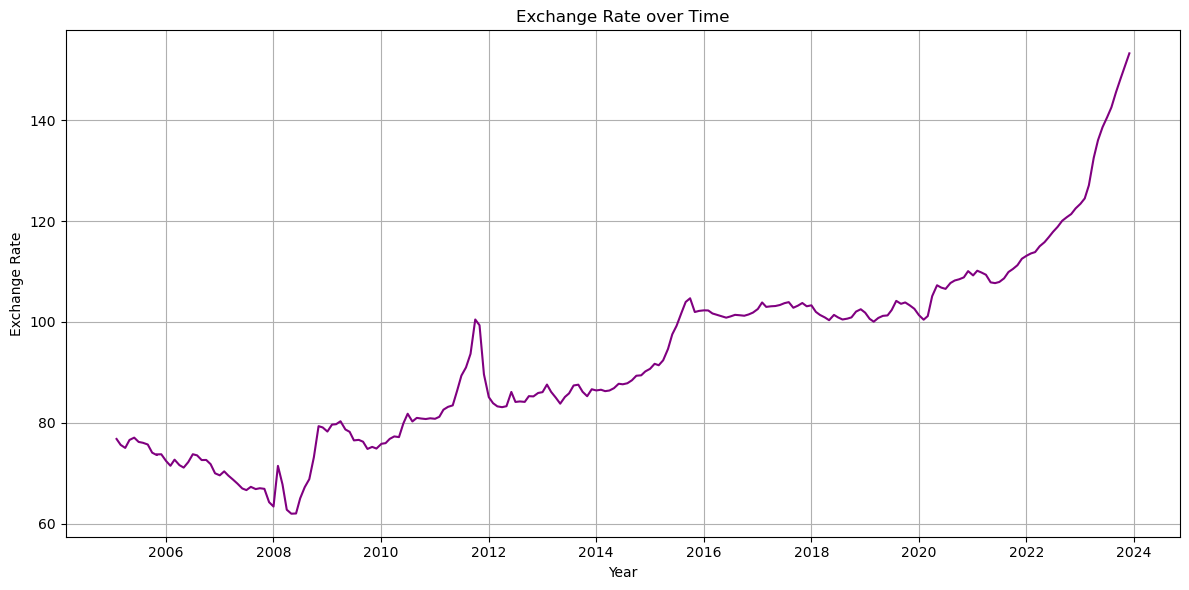

In [14]:
#Using the monthly data set, we shall plot Exchange rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", color="purple")
plt.title("Exchange Rate over Time")
plt.ylabel("Exchange Rate")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

Significant Periods;

2005 - 2008 : We can see the Kenyan Shilling growing in strength steadily.

2008 - 2009 : We see a sharp increase here we see it weakening, we could attribute this to the previous 2007 election period scuffles that occured.

2011 - 2012 : Another election period coming up and as such with the tension seen previously, we can see another hit the shilling took.

2012 - 2016 : We see a steady weakening of the shilling and it weeakens futher approaching 2017. 

2017 - 2018 : Despite being an election period, the currency was fairly stable. 

2022 - 2024 : The sharp rise could be attributed to government borrowing, and also the impending payment periods for the loans previously taken.

## Deposit, Savings, Lending and Over-Draft

We shall combine the above plots as they are very closely inter-related.

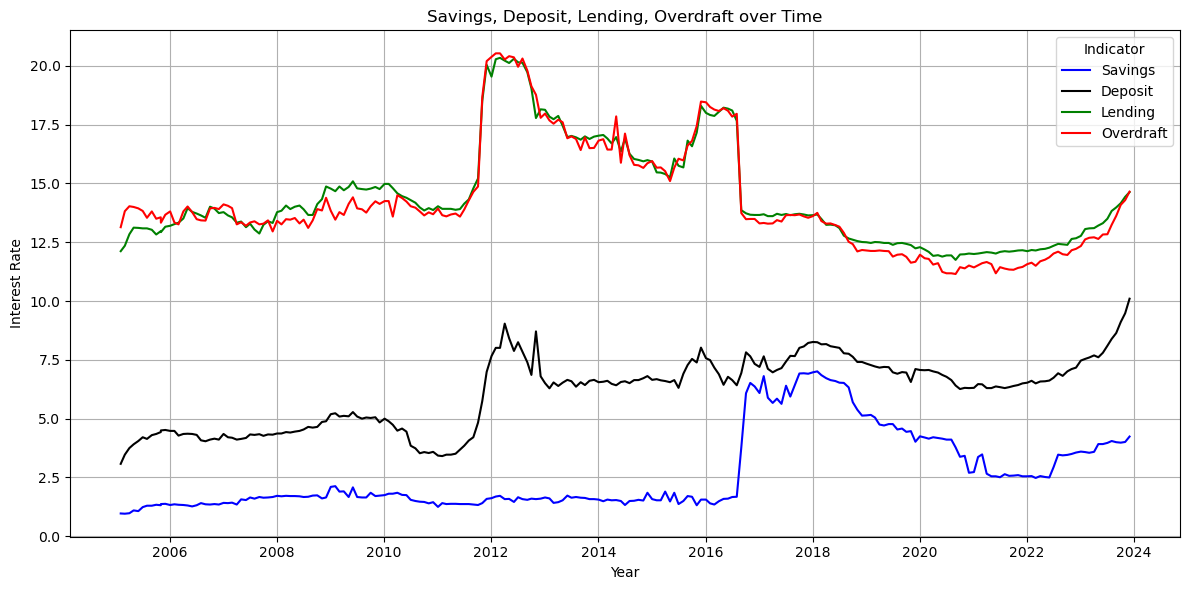

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfmonthly, x="Date", y="Savings", color="blue",label="Savings")
sns.lineplot(data=dfmonthly, x="Date", y="Deposit", color="black",label="Deposit")
sns.lineplot(data=dfmonthly, x="Date", y="Lending ", color="green",label="Lending")
sns.lineplot(data=dfmonthly, x="Date", y="Overdraft ", color="red",label="Overdraft")
plt.title("Savings, Deposit, Lending, Overdraft over Time")
plt.ylabel("Interest Rate")
plt.xlabel("Year")
plt.legend(title="Indicator")
plt.grid(True)
plt.tight_layout()
plt.show()

Key Takeaways;

1. Lending and Overdraft - These rates are very closely related to each other as they are forms of loans, however it appears that the overdraft rates appear to be slightly cheaper than lending rates.

2. Deposit and Savings - Deposits being an investment vehicle, seem to attract better interest rates as the bank can use this money for business, however savings are much lower due to the volatility in withdrawals by bank customers. 

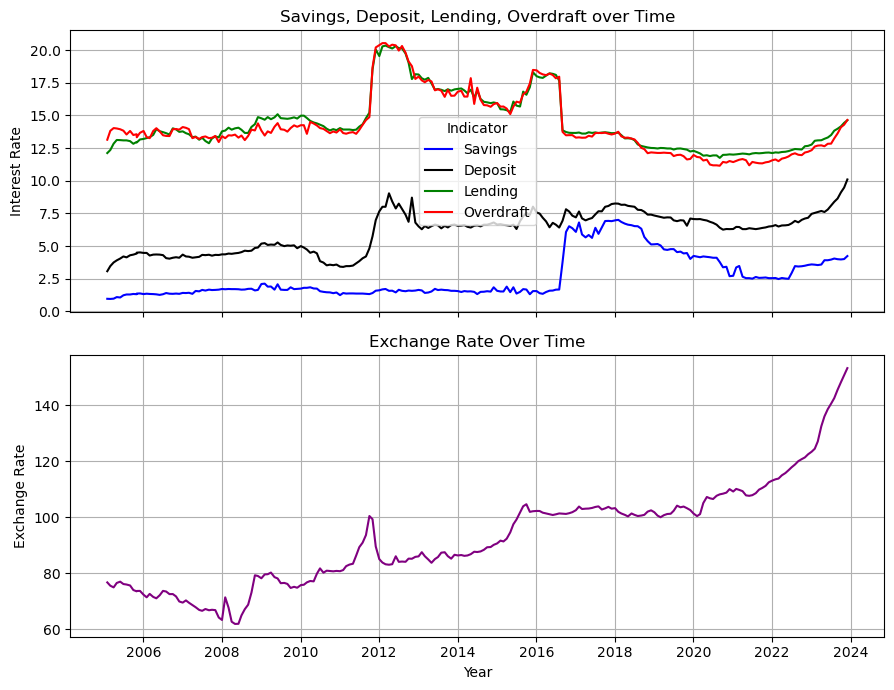

In [16]:
#we shall stack the plots ontop of each other to get a clearer side by side analysis on the movements.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7), sharex=True)

sns.lineplot(data=dfmonthly, x="Date", y="Savings", color="blue", label="Savings", ax=ax1)
sns.lineplot(data=dfmonthly, x="Date", y="Deposit", color="black", label="Deposit", ax=ax1)
sns.lineplot(data=dfmonthly, x="Date", y="Lending ", color="green", label="Lending", ax=ax1)
sns.lineplot(data=dfmonthly, x="Date", y="Overdraft ", color="red", label="Overdraft", ax=ax1)

ax1.set_title("Savings, Deposit, Lending, Overdraft over Time")
ax1.set_ylabel("Interest Rate")
ax1.legend(title="Indicator")
ax1.grid(True)

sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", color="purple", ax=ax2)
ax2.set_title("Exchange Rate Over Time")
ax2.set_ylabel("Exchange Rate")
ax2.set_xlabel("Year")
ax2.grid(True)

plt.tight_layout()
plt.show()

There seems to be a pattern in the movement and as such it would be best to overlay both plots to see the movements much clearer.

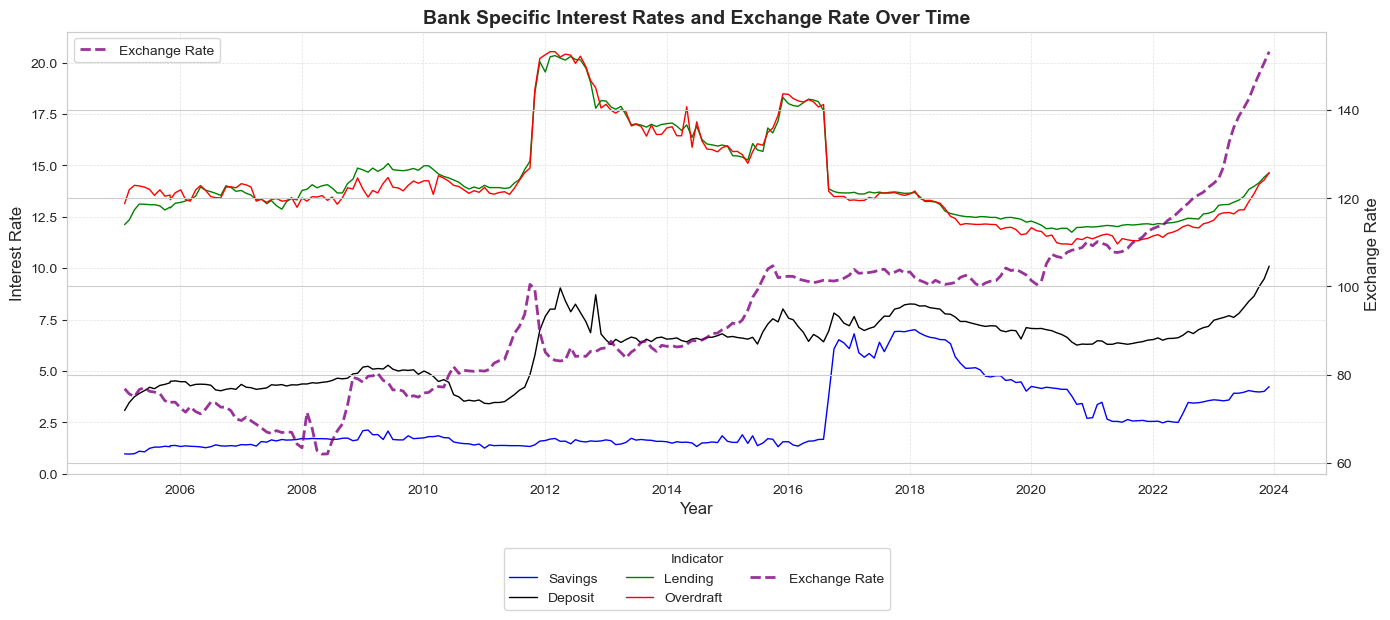

In [17]:
#overlaying the bank interest rates and the exchage rate
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="Savings", ax=ax1, label="Savings", color="blue", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Deposit", ax=ax1, label="Deposit", color="black", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Lending ", ax=ax1, label="Lending", color="green", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Overdraft ", ax=ax1, label="Overdraft", color="red", linewidth=1)

ax1.set_ylabel("Interest Rate", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Bank Specific Interest Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.show()

In [18]:
# Let's compute a correlation matrix. 
cols = ["Savings", "Deposit", "Lending ", "Overdraft ", "exchange_rate"]
corr_matrix = dfmonthly[cols].corr()
print(corr_matrix)

                Savings   Deposit  Lending   Overdraft   exchange_rate
Savings        1.000000  0.618353 -0.417070   -0.430253       0.558949
Deposit        0.618353  1.000000  0.217833    0.186073       0.736237
Lending       -0.417070  0.217833  1.000000    0.983779      -0.214734
Overdraft     -0.430253  0.186073  0.983779    1.000000      -0.249163
exchange_rate  0.558949  0.736237 -0.214734   -0.249163       1.000000


Key Takeaways;

1. The deposit interast rate tends to follow closely the exchange rate, we can attribute this to the fact that money is weakening, less people are investing and as such due to the low demand for fixed deposits, banks are forced to increase the interest rate to attract more money.

2. Lending and Overdraft have very little effect on the exchange rate.



## Interbank, Central Bank Rate

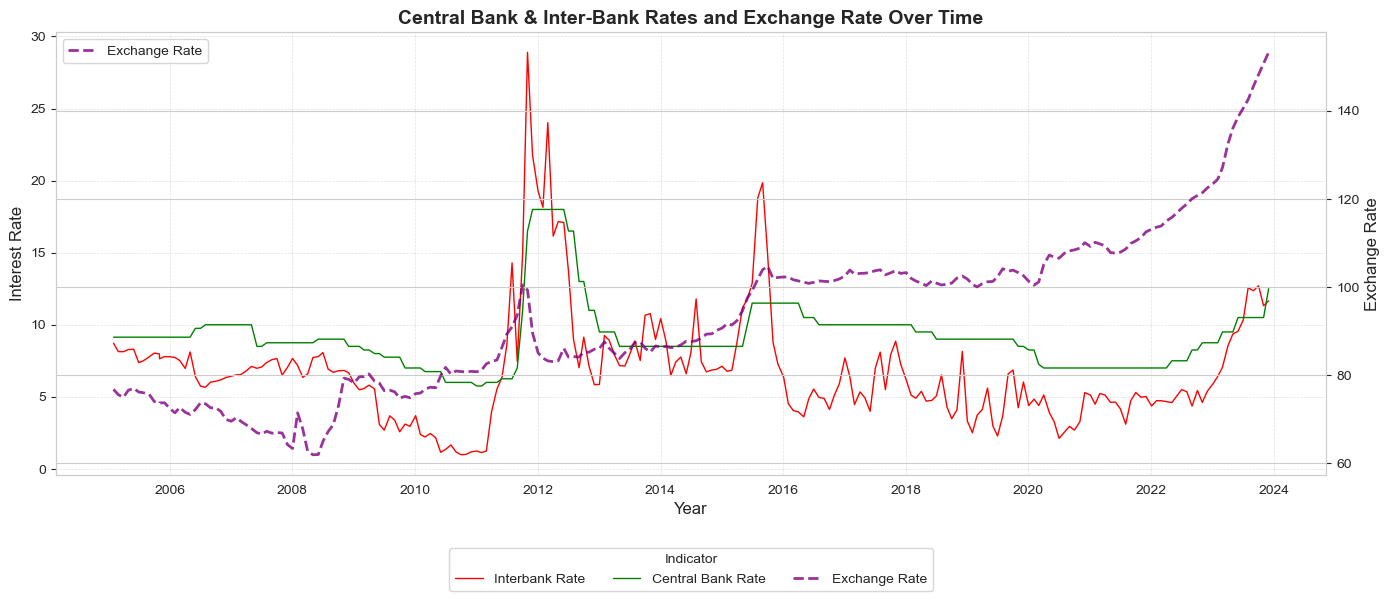

In [19]:
#We shall combine the plots for Interbank, Central Bank rate. 
#We shall then view these against the exchange rate. As the two are very closely inter-related.
#using a similar overlay as well.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="Interbank Rate", ax=ax1, label="Interbank Rate", color="red", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Central Bank Rate", ax=ax1, label="Central Bank Rate", color="green", linewidth=1)

ax1.set_ylabel("Interest Rate", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Central Bank & Inter-Bank Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [20]:
cols = ["Interbank Rate", "Central Bank Rate","Cash Reserve Requirement","exchange_rate"]
corr_matrix = dfmonthly[cols].corr()
print(corr_matrix)

                          Interbank Rate  Central Bank Rate  \
Interbank Rate                  1.000000           0.740252   
Central Bank Rate               0.740252           1.000000   
Cash Reserve Requirement        0.223319           0.323986   
exchange_rate                   0.036207           0.014876   

                          Cash Reserve Requirement  exchange_rate  
Interbank Rate                            0.223319       0.036207  
Central Bank Rate                         0.323986       0.014876  
Cash Reserve Requirement                  1.000000      -0.676145  
exchange_rate                            -0.676145       1.000000  


This plot compares Central Bank Rate and Interbank Rate with the exchange rate over time, helping evaluate how monetary policy and market liquidity conditions influence currency value.


Key Takeaways;

1. We didn't use cash reserve in the plot as the movement is static and doesnt follow demand/supply.

2. The movements seen and pattern in the above plot is purely coincidental as the correlation tells a different story.

3. Interbank Rate spikes reflect market stress or tightening liquidity.

4. Times when the exchange rate diverges from interest rate trends—indicating external or market-driven factors.

## Treasury Bills (91-Day, 182-Days, 364-Days)

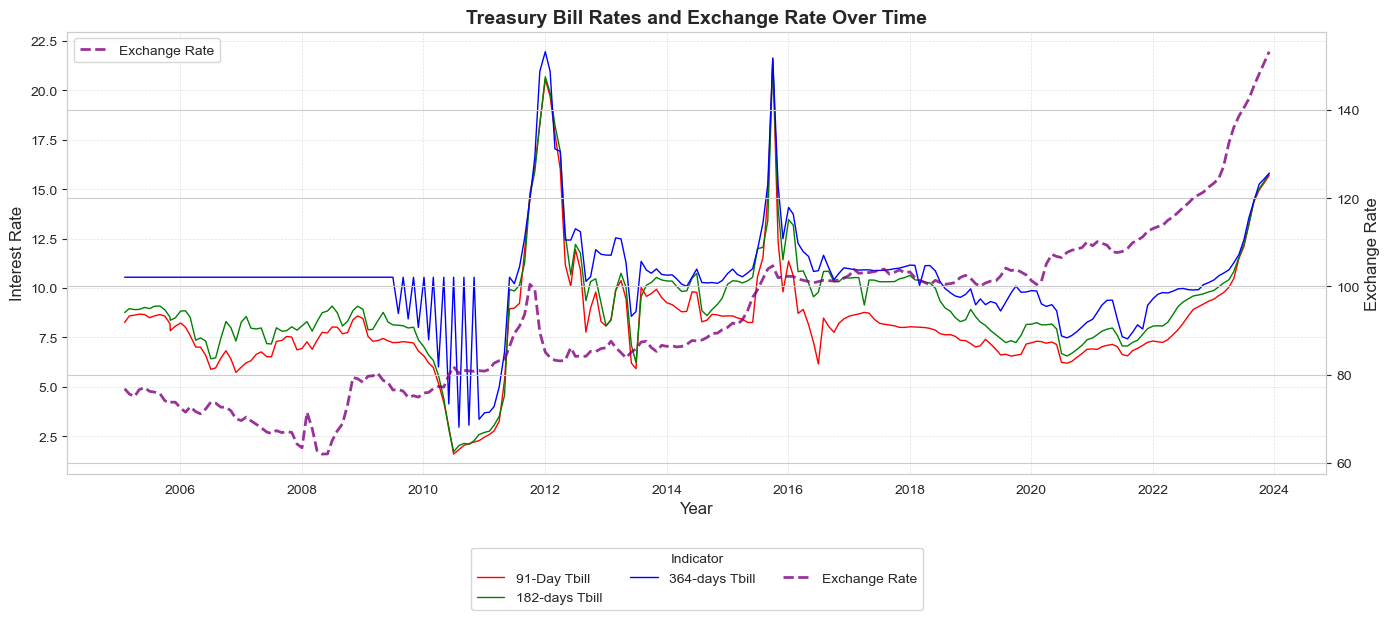

In [21]:
#We shall combine the plots for Treasury Bills. 
# We shall then view these against the exchange rate. As the three are very closely inter-related.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="91-Day Tbill", ax=ax1, label="91-Day Tbill", color="red", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="182-days Tbill", ax=ax1, label="182-days Tbill", color="green", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="364-days Tbill", ax=ax1, label="364-days Tbill", color="blue", linewidth=1)

ax1.set_ylabel("Interest Rate", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Treasury Bill Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.show()

In [22]:
cols = ["91-Day Tbill", "182-days Tbill","364-days Tbill","exchange_rate"]
corr_matrix = dfmonthly[cols].corr()
print(corr_matrix)

                91-Day Tbill  182-days Tbill  364-days Tbill  exchange_rate
91-Day Tbill        1.000000        0.966954        0.889339       0.313086
182-days Tbill      0.966954        1.000000        0.893948       0.323046
364-days Tbill      0.889339        0.893948        1.000000       0.126816
exchange_rate       0.313086        0.323046        0.126816       1.000000


This plot compares short-term government interest rates (T-bills) with the exchange rate to show how market interest rates may influence or react to currency movements, helping understand investor behavior and macroeconomic conditions.

Key Takeaways;

1. The flat line at the begining of the 364-Tbill(blue), was due to lack of data and also by filling it in using mean, we would have a flat line.

2. The interest rates on the t-bills tend to follow the exchange rate closely, this is because the government tries, to mpo up excess money in circulation using bonds thus preventing it leaving the country and weakening the shilling further.

3. Also the lower correaltion, in the 364-Tbill would imply that the interest rate movements are made to counter on a shorter term basis compared to longterm.

## Total Remittances and Total Debt

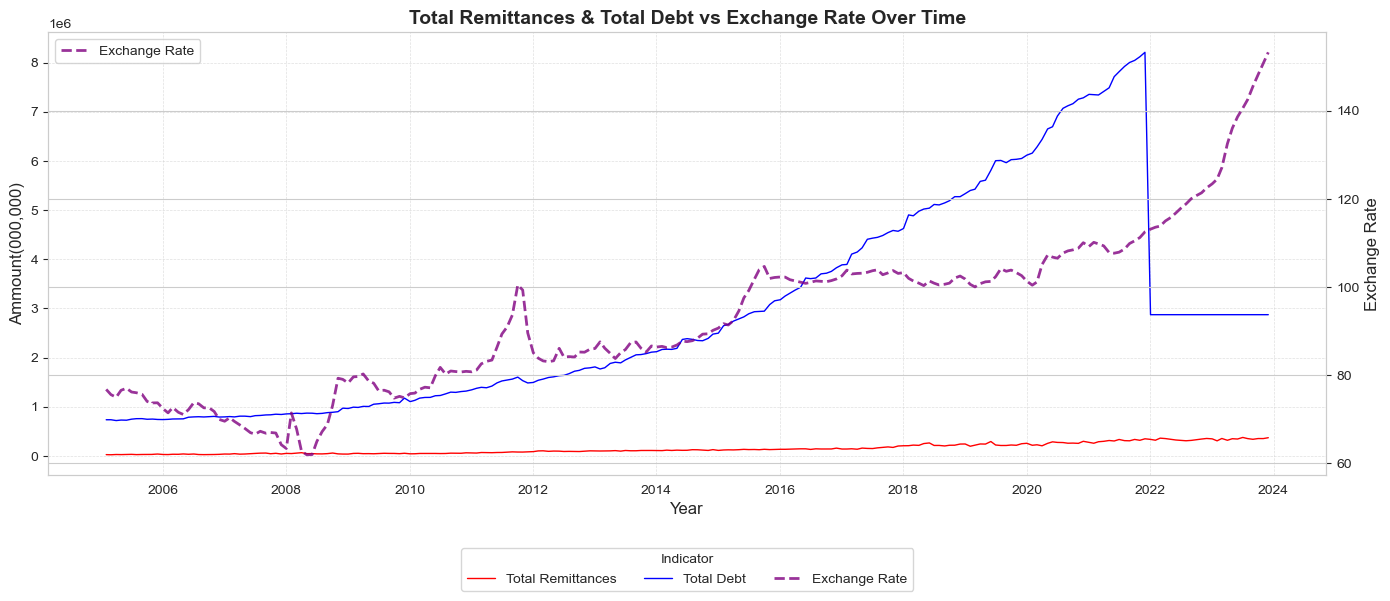

In [23]:
#We shall combine the plots for Total Remittances and Total Debt. 
# We shall then view these against the exchange rate. As the two are very closely inter-related.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="Total Remittances ", ax=ax1, label="Total Remittances", color="red", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="Total Debt", ax=ax1, label="Total Debt", color="blue", linewidth=1)

ax1.set_ylabel("Ammount(000,000)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Total Remittances & Total Debt vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [24]:
cols = ["Total Remittances ", "Total Debt","exchange_rate"]
corr_matrix = dfmonthly[cols].corr()
print(corr_matrix)

                    Total Remittances   Total Debt  exchange_rate
Total Remittances             1.000000    0.751822       0.912210
Total Debt                    0.751822    1.000000       0.635804
exchange_rate                 0.912210    0.635804       1.000000


This plot compares remittance inflows and total debt levels against the exchange rate over time to evaluate how external support and national debt may influence currency strength or depreciation.

Key Takeaways;

1. Remittances have remained steady over the years.

2. The country may have been using external debt to cushion the cureency, however as soon as the repayment matured and Kenya made it
the currency greatly weakened due to the currency outflow.


## Inflation

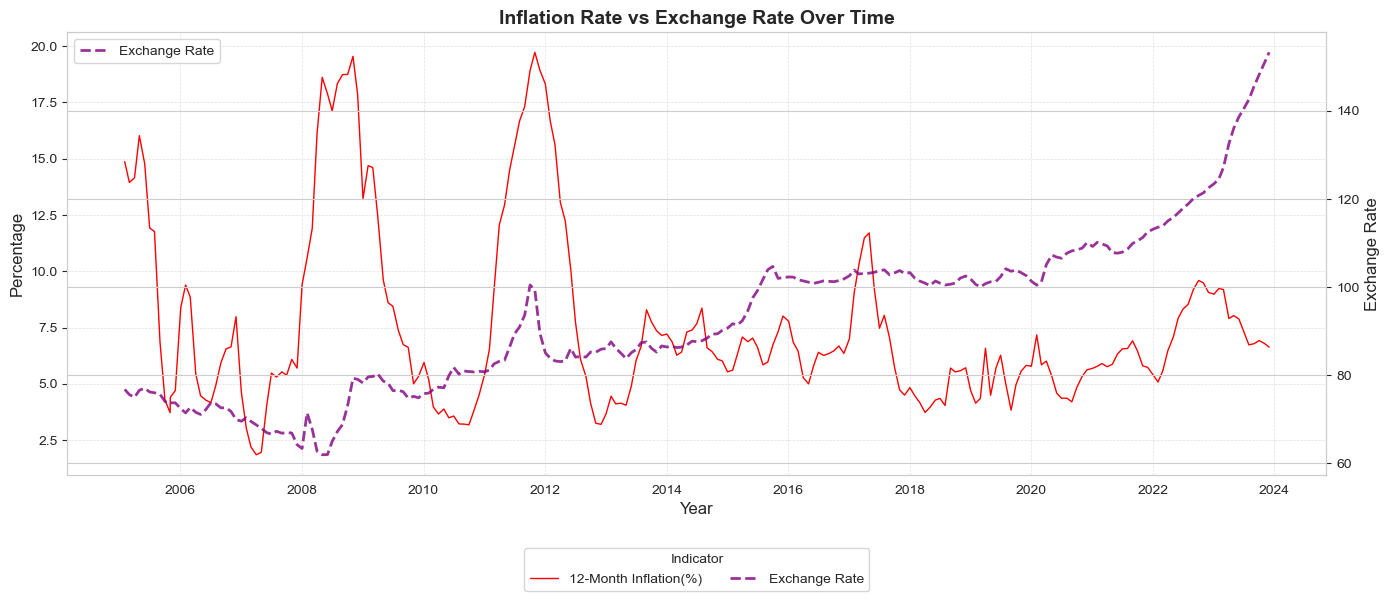

In [25]:
#We shall plot for Inflation alone. 
# We shall then view it against the exchange rate.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="12-Month Inflation(%)", ax=ax1, label="12-Month Inflation(%)", color="red", linewidth=1)

ax1.set_ylabel("Percentage", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Inflation Rate vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfmonthly, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.show()

In [26]:
cols = ["12-Month Inflation(%)","exchange_rate"]
corr_matrix = dfmonthly[cols].corr()
print(corr_matrix)

                       12-Month Inflation(%)  exchange_rate
12-Month Inflation(%)               1.000000      -0.167633
exchange_rate                      -0.167633       1.000000


Key takeaway;

Inflation has very little effect on exchange rate. However, significant similar spikes are seen around the election periods of 2012, 2017.

### Treasury bills vs Inflation

Key to note***

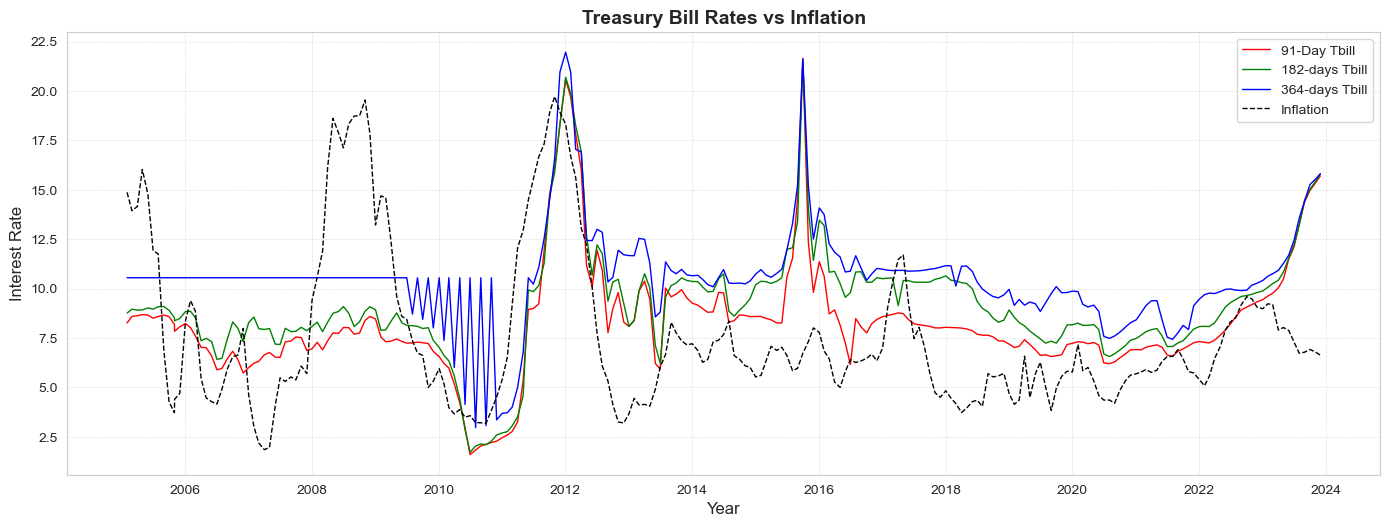

In [27]:
#We shall combine the plots for Treasury Bills v Inflation. 
# We shall then view these against the exchange rate. As the two are very closely inter-related.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfmonthly, x="Date", y="91-Day Tbill", ax=ax1, label="91-Day Tbill", color="red", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="182-days Tbill", ax=ax1, label="182-days Tbill", color="green", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="364-days Tbill", ax=ax1, label="364-days Tbill", color="blue", linewidth=1)
sns.lineplot(data=dfmonthly, x="Date", y="12-Month Inflation(%)", ax=ax1, linestyle='--',label="Inflation", color="black", linewidth=1)

ax1.set_ylabel("Interest Rate", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Treasury Bill Rates vs Inflation", fontsize=14, fontweight="bold")

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 
plt.show()

In [28]:
cols = ["12-Month Inflation(%)","91-Day Tbill", "182-days Tbill","364-days Tbill","exchange_rate"]
corr_matrix = dfmonthly[cols].corr()
print(corr_matrix)

                       12-Month Inflation(%)  91-Day Tbill  182-days Tbill  \
12-Month Inflation(%)               1.000000      0.397297        0.344562   
91-Day Tbill                        0.397297      1.000000        0.966954   
182-days Tbill                      0.344562      0.966954        1.000000   
364-days Tbill                      0.327679      0.889339        0.893948   
exchange_rate                      -0.167633      0.313086        0.323046   

                       364-days Tbill  exchange_rate  
12-Month Inflation(%)        0.327679      -0.167633  
91-Day Tbill                 0.889339       0.313086  
182-days Tbill               0.893948       0.323046  
364-days Tbill               1.000000       0.126816  
exchange_rate                0.126816       1.000000  


The above plot proves the close relation ship between inflation and Treasury bills, and how they are used a fiscal tool to control the inflation rate. However, we see that the influences are not so significantlly strong hence why treasury bills are used in conjuction with other methods to stabilize inflation.

## We shall move to the dfaverage data set as it contains data aggregated to a yearly basis, and contains singular values for the indicators as they were measured yearly.

## Imports and Exports

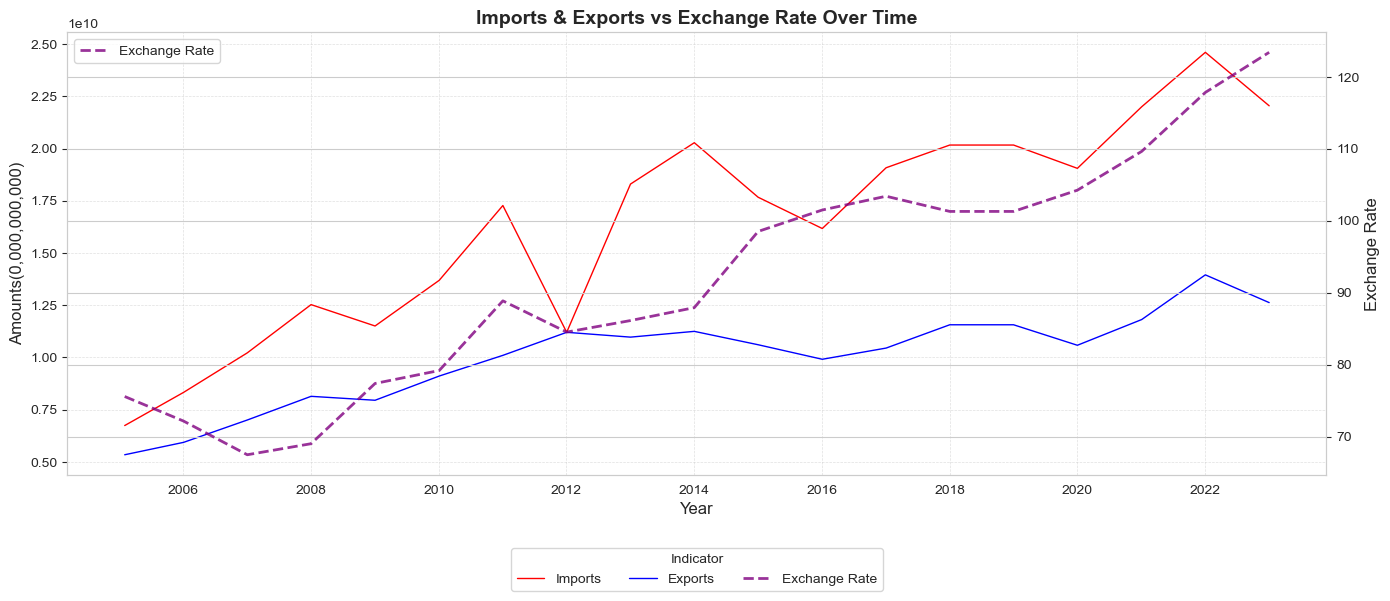

In [29]:
#We shall combine the plots for Imports and Exports. 
# We shall then view these against the exchange rate. As the three are very closely inter-related.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfaverage, x="Date", y="Imports", ax=ax1, label="Imports", color="red", linewidth=1)
sns.lineplot(data=dfaverage, x="Date", y="Exports", ax=ax1, label="Exports", color="blue", linewidth=1)

ax1.set_ylabel("Amounts(0,000,000,000)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Imports & Exports vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfaverage, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [30]:
cols = ["Imports","Exports","exchange_rate"]
corr_matrix = dfaverage[cols].corr()
print(corr_matrix)

                Imports   Exports  exchange_rate
Imports        1.000000  0.919580       0.868884
Exports        0.919580  1.000000       0.836441
exchange_rate  0.868884  0.836441       1.000000


The plot helps assess how trade performance—especially trade imbalances—may affect currency strength, showing whether higher imports or exports correspond with currency depreciation or appreciation.

Key Takeaways;

1. Kenya is a net importer however our exports are following closely.

2. As the imports rise, so does the exchange rate as money is flowing out of the country.

3. This is cushioned by our exports as money comes back in that strengthens the cureency.

We have very strong correlation between these features.

## Foreign Direct Investment and IBRD loans and IDA credits (DOD, current US$)

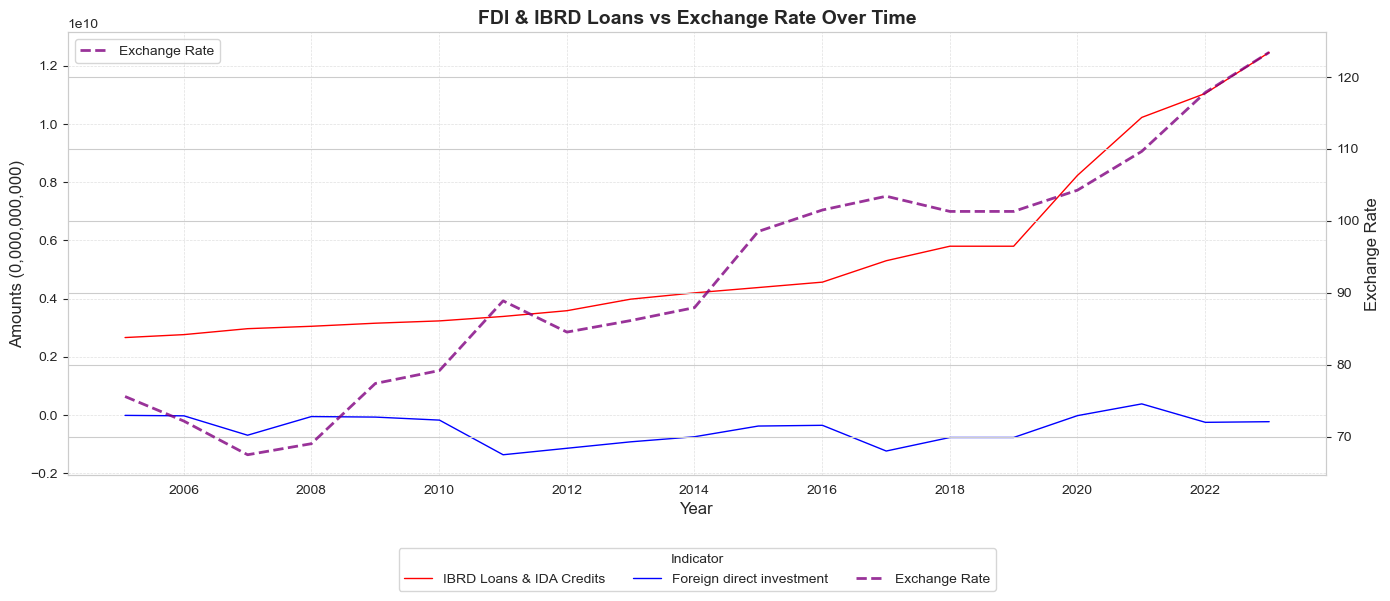

In [31]:
#We shall combine the plots for FDI and IBRD. 
# We shall then view these against the exchange rate. As the three are very closely inter-related.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfaverage, x="Date", y="IBRD loans and IDA credits (DOD, current US$)", ax=ax1, label="IBRD Loans & IDA Credits", color="red", linewidth=1)
sns.lineplot(data=dfaverage, x="Date", y="Foreign direct investment", ax=ax1, label="Foreign direct investment", color="blue", linewidth=1)

ax1.set_ylabel("Amounts (0,000,000,000)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("FDI & IBRD Loans vs Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfaverage, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

This plot compares FDI and external loans (IBRD/IDA) with the exchange rate over time, offering insights into how capital inflows and external borrowing affect currency strength and economic confidence.

Key Takeaway;

1. The more we borrow, the weaker the shilling becomes.


## Unemployment

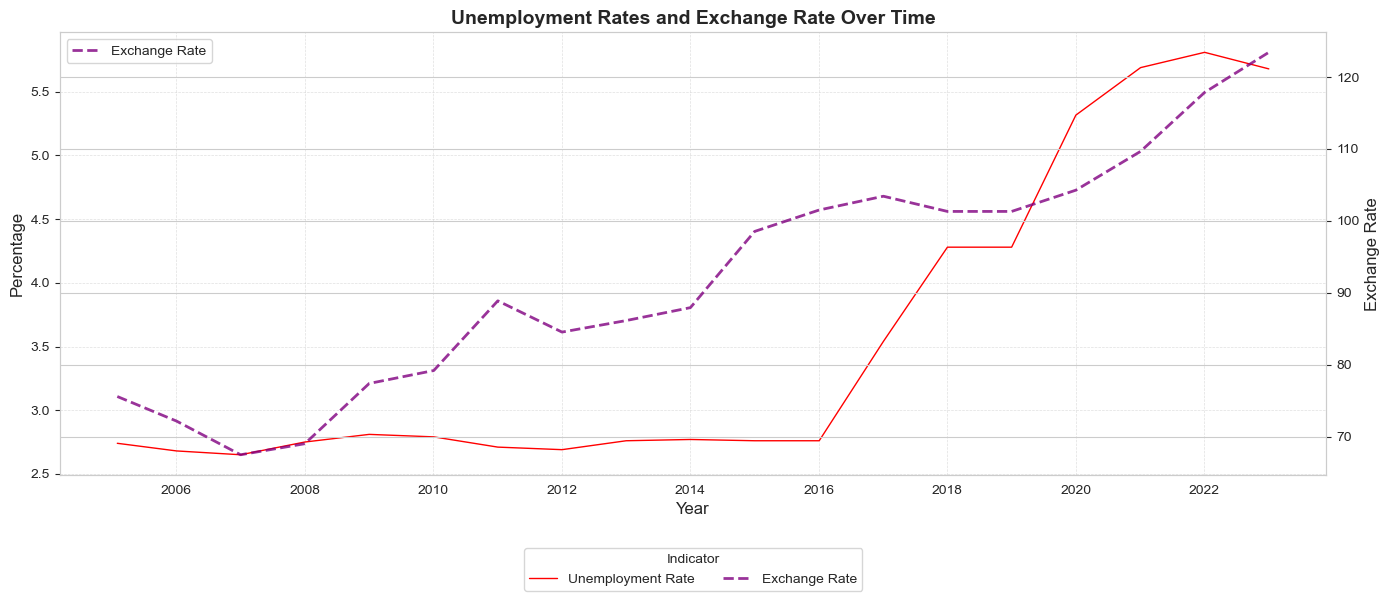

In [32]:
#We shall combine the plots for Unemployment. 
# We shall then view these against the exchange rate. As two are very closely inter-related.
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=dfaverage, x="Date", y="Unemployment Rate", ax=ax1, label="Unemployment Rate", color="red", linewidth=1)

ax1.set_ylabel("Percentage", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_title("Unemployment Rates and Exchange Rate Over Time", fontsize=14, fontweight="bold")

ax2 = ax1.twinx()
sns.lineplot(data=dfaverage, x="Date", y="exchange_rate", ax=ax2,
             label="Exchange Rate", color="purple", linewidth=2, linestyle="--", alpha=0.8)

ax2.set_ylabel("Exchange Rate", fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, title="Indicator", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

The plot highlights the relationship between labor market conditions and currency value, showing how domestic economic performance can influence the exchange rate.

Key Takeaway;

1. The rise in unemployment is due to jobs not being created because there is low investment in the country, the effect doesn't show until much later as companies don't close down immediately we see a drop in currency value, but it catches up eventually.

## MODELLING